In [50]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

SKINS_DIR = '../skins/'
FACES_DIR = '../faces/'

In [53]:
def read_face_file(file_name: str) -> np.ndarray:
    return mpimg.imread(os.path.join(FACES_DIR, file_name))

def read_skin_file(file_name: str) -> np.ndarray:
    return mpimg.imread(os.path.join(SKINS_DIR, file_name))

## show mask and face

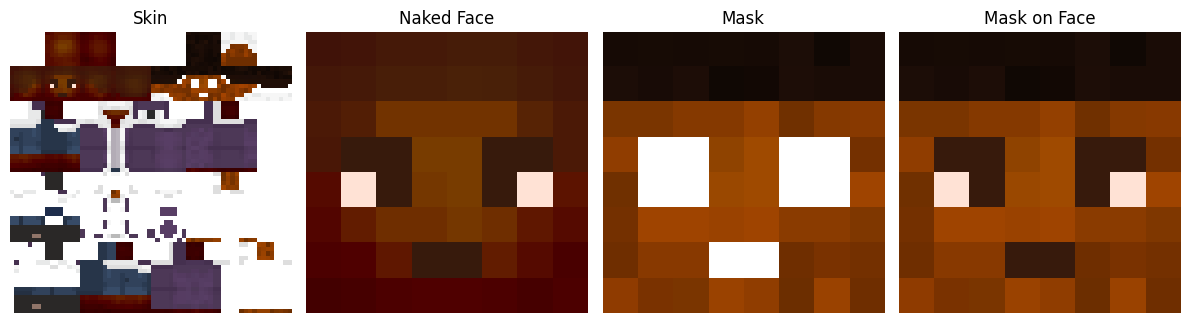

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# source image: https://www.minecraftskins.com/skin/21856799/trial-boy/
skin = mpimg.imread("./trial-boy-21856799.png")

# skin image
axs[0].imshow(skin)
axs[0].set_title('Skin')
axs[0].axis('off')

# naked face
face = skin[8:16, 8:16]
axs[1].imshow(face)
axs[1].set_title('Naked Face')
axs[1].axis('off')

# mask
mask = skin[8:16, 40:48]
axs[2].imshow(mask)
axs[2].set_title('Mask')
axs[2].axis('off')

# mask on face
new_face = face.copy()
opacity = mask[:, :, 3]
non_zero_opacity_indices = np.where(opacity != 0)
new_face[non_zero_opacity_indices] = mask[non_zero_opacity_indices]
axs[3].imshow(new_face)
axs[3].set_title('Mask on Face')
axs[3].axis('off')

plt.tight_layout()
plt.show()

## put mask on face and replace with skin

In [22]:
skins_files = os.listdir(SKINS_DIR)

for skin_file in skins_files:
    skin = read_skin_file(skin_file)
    face = skin[8:16, 8:16]
    mask = skin[8:16, 40:48]

    non_zero_opacity_indices = np.where(mask[:, :, 3] != 0)
    face[non_zero_opacity_indices] = mask[non_zero_opacity_indices]
    mpimg.imsave(os.path.join(FACES_DIR, skin_file), face)

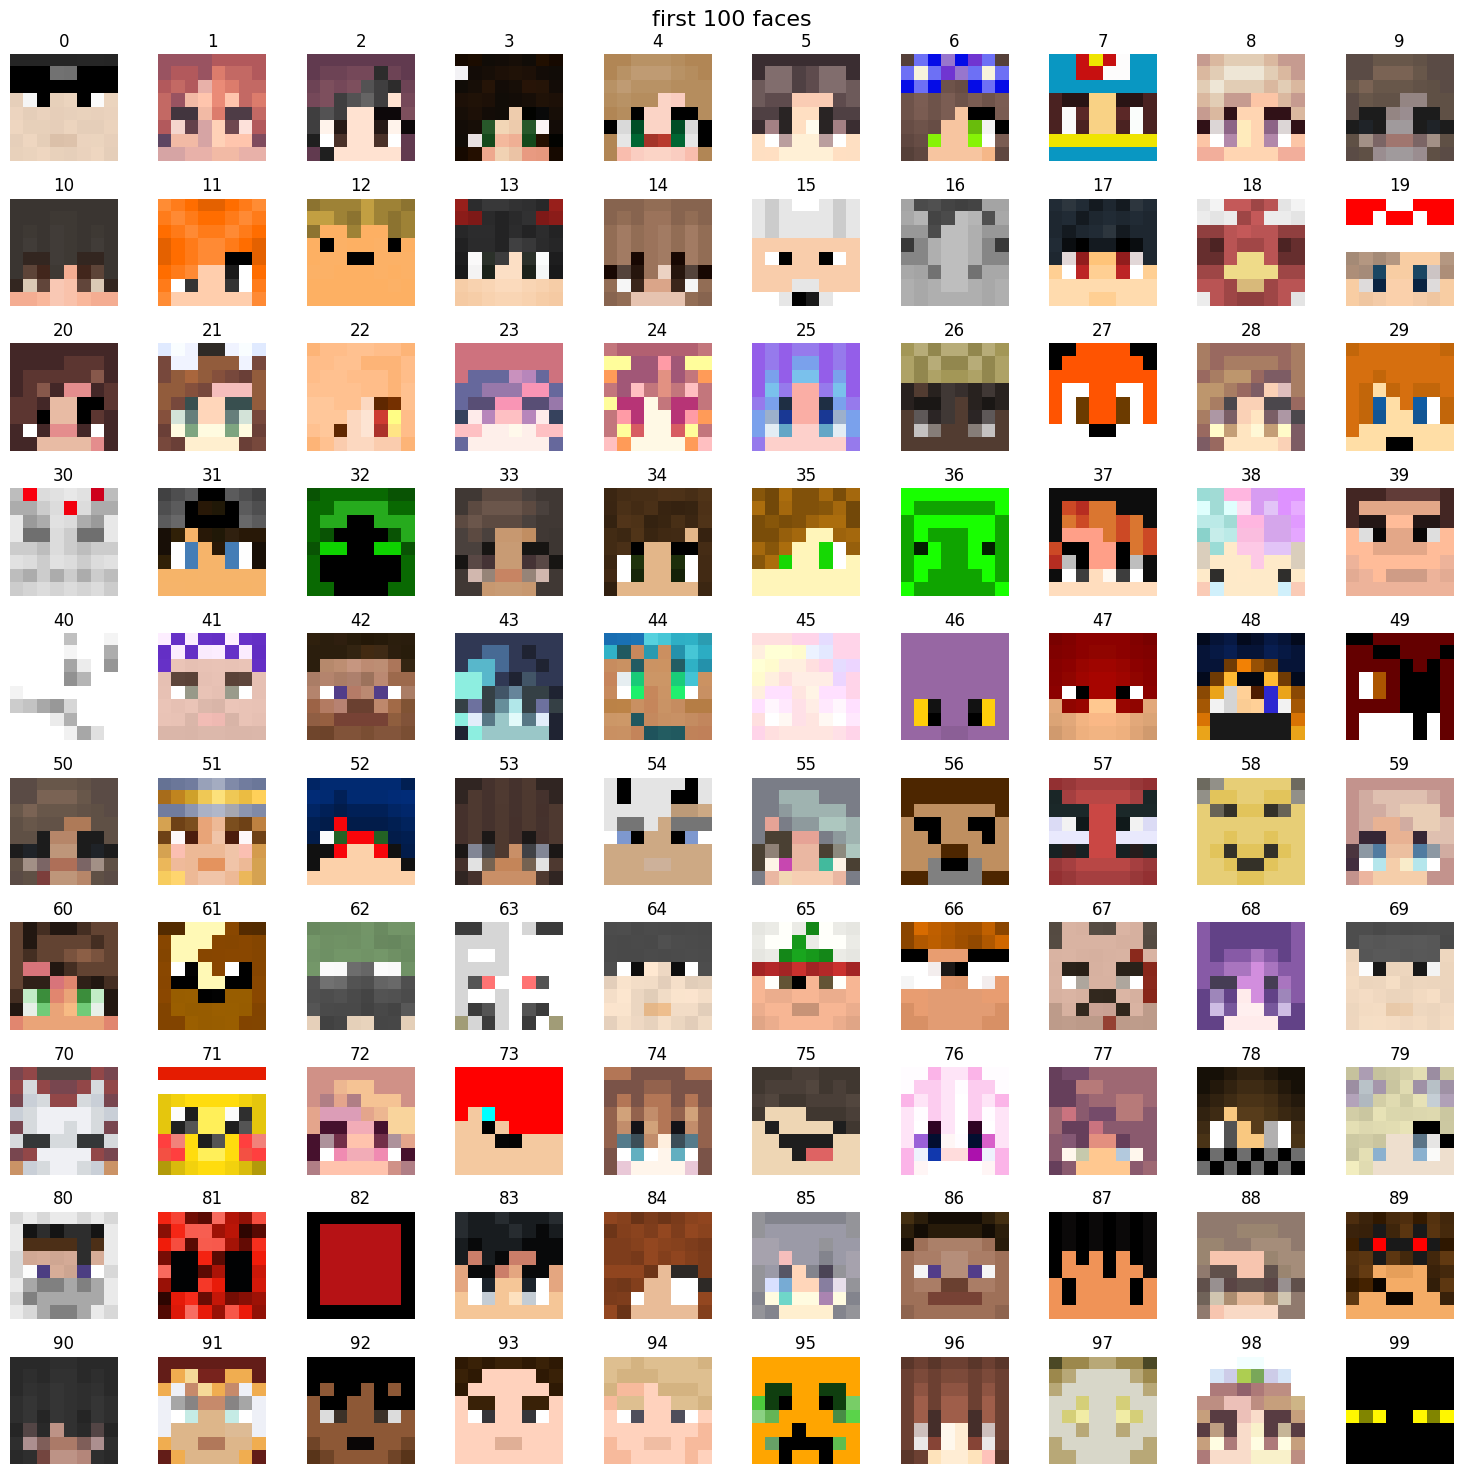

In [67]:
num_faces = 100
face_files = os.listdir(FACES_DIR)

fig, axs = plt.subplots(num_faces // 10, 10, figsize=(15, 15))
fig.suptitle(f'first {num_faces} faces', fontsize=16)

for i, face_file in enumerate(face_files[:num_faces]):
    img = read_face_file(face_file)
    axs[i // 10, i % 10].imshow(img)
    axs[i // 10, i % 10].axis('off')
    axs[i // 10, i % 10].set_title(str(i))

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## remove faces with insufficient color count

In [27]:
face_files = os.listdir(FACES_DIR)

num_invalid_faces = 0

for face_file in face_files:
    img = read_face_file(face_files)
    if len(np.unique(img[:,:,:3])) < 3:     # check length of unique RGB values
        num_invalid_faces += 1
        os.remove(os.path.join(FACES_DIR, face_file))

print(f'removed {num_invalid_faces} invalid face images')

removed 113 invalid face images


## check symmetricity

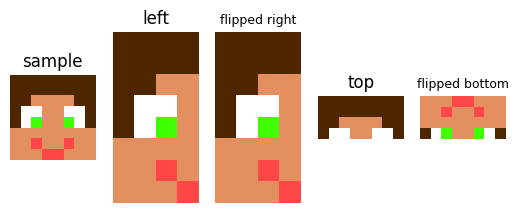

In [150]:
sample = read_face_file('00004.png')[:,:,:3]
left = sample[:, :4]
right = np.flip(sample[:, 4:], axis=1)
top = sample[:4]
bottom = np.flip(sample[4:], axis=0)

fig, axs = plt.subplots(1, 5)
axs[0].imshow(sample)
axs[0].set_title('sample')
axs[0].axis('off')

axs[1].imshow(left)
axs[1].set_title('left')
axs[1].axis('off')

axs[2].imshow(right)
axs[2].set_title('flipped right', fontsize=9)
axs[2].axis('off')

axs[3].imshow(top)
axs[3].set_title('top')
axs[3].axis('off')

axs[4].imshow(bottom)
axs[4].set_title('flipped bottom', fontsize=9)
axs[4].axis('off')

plt.show()

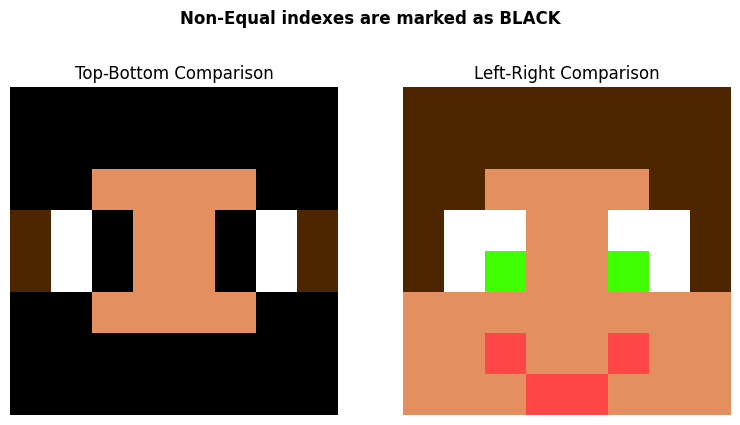

In [156]:
equal_pixels_tb = np.all(top == bottom, axis=2)
tb_compare = np.zeros_like(sample)
tb_compare[:4] = np.where(equal_pixels_tb[:, :, np.newaxis], top, 0)
tb_compare[4:] = np.where(equal_pixels_tb[:, :, np.newaxis], bottom, 0)
tb_compare[4:] = np.flip(tb_compare[4:], axis=0)


equal_pixels_lr = np.all(left == right, axis=2)
lr_compare = np.zeros_like(sample)
lr_compare[:, :4] = np.where(equal_pixels_lr[:, :, np.newaxis], left, 0)
lr_compare[:, 4:] = np.where(equal_pixels_lr[:, :, np.newaxis], right, 0)
lr_compare[:, 4:] = np.flip(lr_compare[:, 4:], axis=1)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(tb_compare)
axs[0].set_title('Top-Bottom Comparison')
axs[0].axis('off')

axs[1].imshow(lr_compare)
axs[1].set_title('Left-Right Comparison')
axs[1].axis('off')

fig.suptitle('Non-Equal indexes are marked as BLACK', fontsize=12, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()

Now let's bring top/down and right/left equality percentage on the normal-distribution plot and remove the rare ones

In [158]:
...

Ellipsis

## rename all files to zero-padded 5 digits

In [48]:
import os

skins = os.listdir(FACES_DIR)

for index, file_name in enumerate(skins):
    new_file_name = "{:05d}".format(index + 1)
    
    file_path = os.path.join(FACES_DIR, file_name)
    
    _, extension = os.path.splitext(file_name)
    
    new_file_path = os.path.join(FACES_DIR, new_file_name + extension)
    
    os.rename(file_path, new_file_path)
